<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Recurrent_Neural_Network(RNNs(NLP)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Recurrent Neural Network(RNNs)** </center>

--> ANNs to handle sequential data

You need to develop RNN models that can do the following:


*   Handle variable-length input sequences

*   Track long-term dependencies in the data

*   Maintain information about the sequence's order

*   Share parameters across the entirety of the sequence

### **Training an ANN for Sequential Data - Nvidia Stock prediction**


*   **target variable** -> Price of stock in a given day
*   **features** -> Price of a stock in a previous 60 days

In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Import Nvidia Stock Data:

In [ ]:
# import dataset
data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter09/Datasets/NVDA.csv")

# display first 5 rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-22,19.650000,19.650000,19.17,19.410000,18.851749,8911800
1,2015-07-23,19.450001,19.940001,19.41,19.650000,19.084845,4247900
2,2015-07-24,19.790001,19.809999,19.34,19.420000,18.861464,4721100
3,2015-07-27,19.250000,19.530001,19.09,19.309999,18.754622,4810500
4,2015-07-28,19.360001,19.860001,19.16,19.730000,19.162542,4957700


2. Split the dataset into training and test sets:

In [ ]:
#  use data before "2019-01-01" as training set
data_training = data[data["Date"] < "2019-01-01"].copy()

# use data after "2019-01-01" as testing set
data_test = data[data["Date"] >= "2019-01-01"].copy()

In [ ]:
# drop the un-necessary columns after splitting
training_data = data_training.drop(["Date", "Adj Close"], axis=1)
test_data = data_test.drop(["Date", "Adj Close"], axis=1)

# display the changed dataframe
training_data.head()

,Open,High,Low,Close,Volume
0,19.650000,19.650000,19.17,19.410000,8911800
1,19.450001,19.940001,19.41,19.650000,4247900
2,19.790001,19.809999,19.34,19.420000,4721100
3,19.250000,19.530001,19.09,19.309999,4810500
4,19.360001,19.860001,19.16,19.730000,4957700


3. Rescale the training data in a uniform range

In [ ]:
# store the column names before rescaling
train_cols = training_data.columns
test_cols = test_data.columns

train_cols

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# initialize the scaler
scaler = MinMaxScaler()

# perform the rescaling
training_data = scaler.fit_transform(training_data)
# training_data = pd.DataFrame(training_data, columns=train_cols)
# training_data.head()

4. Prepare data from traning and testing

In [ ]:
# check the shape of training_data
training_data.shape[0]

868

In [ ]:
# split your data into X_train and y_train
X_train = []
y_train = []

# Looping through the range of 60 to the number of rows in training_data
for i in range(60, training_data.shape[0]):

    # Appending the values of training_data from i-60 to i to X_train
    X_train.append(training_data[i-60:i])

    # Appending the value of training_data at index i, column 0 to y_train
    y_train.append(training_data[i, 0])

In [ ]:
# convert X_train and y_train into NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# display the dimension of X_train, y_train
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (808, 60, 5)
y_train: (808,)


--> As shown above, the prepared training set contains 808 observations with 60 days of data for the five features.

##### Transform the data into a 2D matrix with the shape of the sample (the number of samples and the number of features in each sample).<br>
##### Stack the features for all 60 days on top of each other to get an output size of (808, 300)

In [ ]:
# save the shape of X_train
X_old_shape = X_train.shape

# reshaping X_train to have X_old_shape[0] rows and X_old_shape[1]*X_old_shape[2] columns
X_train = X_train.reshape(X_old_shape[0], X_old_shape[1]*X_old_shape[2])

# display the reshaped X_train
X_train.shape

(808, 300)

5. Build an ANN model.

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [ ]:
# initialize the ANN model
regressor_ann = Sequential()

In [ ]:
# add an input layer with input_shape as 300
regressor_ann.add(Input(shape = (X_train.shape[1])))

# add dense layer with 512 units as output
regressor_ann.add(Dense(512, activation="relu"))
# add dropout layer to remove 20% of the units during training to prevent overfitting
regressor_ann.add(Dropout(0.2))

# add another dense layer and Dropout layer
regressor_ann.add(Dense(128, activation="relu"))
# add another Dropout layer
regressor_ann.add(Dropout(0.3))

# add another dense and dropout layer
regressor_ann.add(Dense(64, activation="relu"))
regressor_ann.add(Dropout(0.4))

# add another dense and dropout layer
regressor_ann.add(Dense(16, activation="relu"))
regressor_ann.add(Dropout(0.5))

# add final dense layer as output
regressor_ann.add(Dense(1))

In [ ]:
# display of the model architecture
regressor_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               154112    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1

6. Compile the model with optimizer, loss function and accuracy metrics.

In [ ]:
# compile the model for training
regressor_ann.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics="mse"
                    )

7. Train the ANN model

In [ ]:
# fit the ANN model to the training data
regressor_ann.fit(X_train,
                  y_train,
                  epochs=20,
                  batch_size=32
                  )

Epoch 1/20
26/26 [==============================] - 6s 4ms/step - loss: 0.1787 - mse: 0.1787
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.1074 - mse: 0.1074
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0804 - mse: 0.0804
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0725 - mse: 0.0725
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0674 - mse: 0.0674
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0715 - mse: 0.0715
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0544 - mse: 0.0544
Epoch 8/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0497 - mse: 0.0497
Epoch 9/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0512 - mse: 0.0512
Epoch 10/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0541 - mse: 0.0541
Epoch 11/20
26/26 [==============================] - 0s 5ms/step - lo

# <center><b>Recurrent Neural Networks(RNN)</b></center>

**Building an RNN model with an LSTM layer for Nvidia Stock Prediction:**

In [ ]:
# Importing the necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [ ]:
# Creating a Sequential model
regressor = Sequential()

# Adding a LSTM layer with 50 units, 'relu' activation function,
# return_sequences set to True and an input shape of (X_train.shape[1], 5)
# This layer will take in the input data and process it using LSTM units
regressor.add(LSTM(units=50, activation='relu', return_sequences=True,
                   input_shape=(X_train.shape[1], 5)))

# Adding a Dropout layer with a rate of 0.2
# This layer will randomly drop out 20% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.2))

# Adding another LSTM layer with 60 units and 'relu' activation function
# This layer will take in the output from the previous LSTM layer and process it further
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))

# Adding another Dropout layer with a rate of 0.3
# This layer will randomly drop out 30% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.3))

# Adding another LSTM layer with 80 units and 'relu' activation function
# This layer will take in the output from the previous LSTM layer and process it further
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))

# Adding another Dropout layer with a rate of 0.4
# This layer will randomly drop out 40% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.4))

# Adding another LSTM layer with 120 units and 'relu' activation function
# This layer will take in the output from the previous LSTM layer and process it further
regressor.add(LSTM(units=120, activation='relu'))

# Adding another Dropout layer with a rate of 0.5
# This layer will randomly drop out 50% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.5))

# Adding a Dense layer with 1 unit
# This is the output layer that will produce the final prediction
regressor.add(Dense(units=1))

In [ ]:
# view the summary of the model architecture
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300, 50)           11200     
                                                                 
 dropout_4 (Dropout)         (None, 300, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 300, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 300, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 300, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 300, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

------

------

### Build an RNN model with Multiple LSTM Layers to Predict Power Consumption:

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import datetime

# library for performing rescaling
from sklearn.preprocessing import MinMaxScaler

**Load the Dataset**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter09/Datasets/household_power_consumption.csv")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/2007,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/2007,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/2007,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/2007,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


**Create a new column Datetime by combining Date & Time columns**

In [ ]:
# convert the column into datetime object with specified format
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")

# create new "Datetime" column by combing "Date" and "Time" columns
data["Datetime"] = data["Date"].dt.strftime("%Y-%m-%d") + " " + data["Time"]

# convert the "Datetime" column to datetime object
data["Datetime"] = pd.to_datetime(data["Datetime"])

data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0,2007-01-01 00:00:00
1,2007-01-01,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0,2007-01-01 00:01:00
2,2007-01-01,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0,2007-01-01 00:02:00
3,2007-01-01,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0,2007-01-01 00:03:00
4,2007-01-01,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0,2007-01-01 00:04:00


In [ ]:
# sort the dataframe in ascending order using the "Datetime" column
data = data.sort_values(["Datetime"])
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0,2007-01-01 00:00:00
1,2007-01-01,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0,2007-01-01 00:01:00
2,2007-01-01,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0,2007-01-01 00:02:00
3,2007-01-01,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0,2007-01-01 00:03:00
4,2007-01-01,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0,2007-01-01 00:04:00


In [ ]:
# create list to store numeric columns
num_cols = ["Global_active_power", "Global_reactive_power", "Voltage", 
            "Global_intensity","Sub_metering_2", "Sub_metering_3"]

# convert them into numeric datatype
for col in num_cols:
  # if there is any errors during the conversion, they will be set to NaN
  data[col] = pd.to_numeric(data[col], errors="coerce")

# first few rows
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,0:00:00,2.580,0.136,241.97,10.6,0,0.0,0.0,2007-01-01 00:00:00
1,2007-01-01,0:01:00,2.552,0.100,241.75,10.4,0,0.0,0.0,2007-01-01 00:01:00
2,2007-01-01,0:02:00,2.550,0.100,241.64,10.4,0,0.0,0.0,2007-01-01 00:02:00
3,2007-01-01,0:03:00,2.550,0.100,241.71,10.4,0,0.0,0.0,2007-01-01 00:03:00
4,2007-01-01,0:04:00,2.554,0.100,241.98,10.4,0,0.0,0.0,2007-01-01 00:04:00


In [ ]:
# Count missing values in each numeric columns
for col in num_cols:
  missing = data[col].isna().sum()
  print(f"{col} missing values --> {missing}")

Global_active_power missing values --> 3771
Global_reactive_power missing values --> 3771
Voltage missing values --> 3771
Global_intensity missing values --> 3771
Sub_metering_2 missing values --> 3771
Sub_metering_3 missing values --> 3771


In [ ]:
# fill the missing values in those numeric columns with average
for col in num_cols:
  data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
# check if there is any more missing values
for col in num_cols:
  missing = data[col].isna().sum()
  print(f"{col} missing values --> {missing}")

Global_active_power missing values --> 0
Global_reactive_power missing values --> 0
Voltage missing values --> 0
Global_intensity missing values --> 0
Sub_metering_2 missing values --> 0
Sub_metering_3 missing values --> 0


**Drop no longer unnecessay columns from the dataframe:**

In [ ]:
# drop the "Date", "Time", "Global_reactive_power", and "Datetime"
df = data.drop(["Date", "Time", "Global_reactive_power", "Datetime"], axis=1)

df.head()

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,241.97,10.6,0,0.0,0.0
1,2.552,241.75,10.4,0,0.0,0.0
2,2.550,241.64,10.4,0,0.0,0.0
3,2.550,241.71,10.4,0,0.0,0.0
4,2.554,241.98,10.4,0,0.0,0.0


**Perfrom feature scaling to the dataframe:**

In [ ]:
# initialize the scaler
scaler = MinMaxScaler()

# rescale the feature values
df = df.replace("?", np.nan)
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.23592747, 0.67445255, 0.22173913, 0.        , 0.        ,
        0.        ],
       [0.23328296, 0.66642336, 0.2173913 , 0.        , 0.        ,
        0.        ],
       [0.23309407, 0.66240876, 0.2173913 , 0.        , 0.        ,
        0.        ],
       ...,
       [0.26445032, 0.56788321, 0.25217391, 0.        , 0.        ,
        0.9       ],
       [0.24348319, 0.56532847, 0.23478261, 0.        , 0.        ,
        0.9       ],
       [0.23290518, 0.57518248, 0.22173913, 0.        , 0.01282051,
        0.85      ]])

**Prepare training and testing dataset:**

In [ ]:
# to store features and target variables
X = []
y = []

# create a training dataset that has previous 60 minutes' power consumption
# so that you can predict the value for the next minute
for i in range(60, scaled_data.shape[0]):
  X.append(scaled_data[i-60:i])
  y.append(scaled_data[i, 0])

In [ ]:
# convert the X and y into NumPy arrays in preparation for traning the model
X, y = np.array(X), np.array(y)

In [ ]:
# split the dataset into traning and testing sets with data before and after the index 217440
X_train = X[:217440]
y_train = y[:217440]

X_test = X[217440:]
y_test = y[217440:]

**Building the RNN model**

In [ ]:
# required libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

Build the RNN model architecture

In [ ]:
# create a Sequential model
regressor = Sequential()

In [ ]:
# add a LSTM layer with 20units and "relu" activation function
regressor.add(LSTM(units=20, activation="relu", return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
# add dropout layer with 50% to prevent overfitting
regressor.add(Dropout(0.5))

# add another LSTM layer with 40 units and "relu" activation function
regressor.add(LSTM(units=40, activation="relu", return_sequences=True))
# add another dropout layer with a rate of 50% to prevent overfitting
regressor.add(Dropout(0.5))

# add another LSTM layer with 80 units and "relu" activation function
# return_sequences = True, not required in final LSTM layer
regressor.add(LSTM(units=80, activation="relu"))
# add another Dropout layer with a rate of 50% to prevent overfitting
regressor.add(Dropout(0.5))

# add a Dense output layer with 1 unit
regressor.add(Dense(units=1))

In [ ]:
# summary of the RNN model architecture
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 20)            2160      
                                                                 
 dropout (Dropout)           (None, 60, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 40)            9760      
                                                                 
 dropout_1 (Dropout)         (None, 60, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 80)                38720     
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense (Dense)               (None, 1)                 8

**Compile the RNN model with Adam optimizer and MSE loss function**

In [ ]:
regressor.compile(
    optimizer = "Adam",
    loss = "mean_squared_error"
)

**Fit the RNN model to the training dataset**

In [ ]:
regressor.fit(
    X_train, y_train,
    epochs=2,
    batch_size=32
)

Epoch 1/2
4169/6795 [=================>............] - ETA: 6:41 - loss: nan

**Make a Prediction using the trained RNN model**

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

1349/1349 [==============================] - 54s 40ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

**Compare the real household power consumption and model's predictions for the last hour of data from test set**

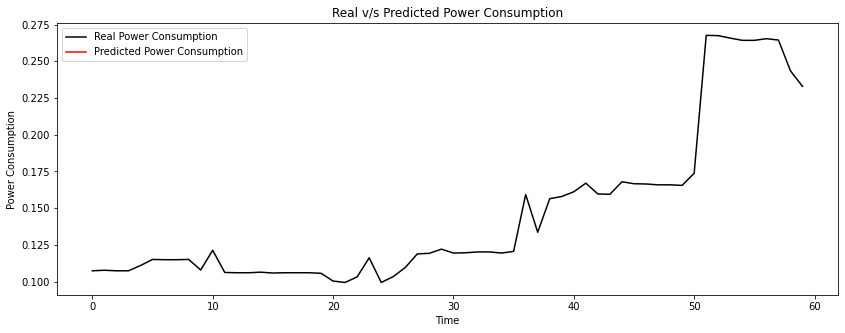

In [ ]:
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(14, 5))

# plot the last 60 values of the true power consumption
plt.plot(y_test[-60:], color="black", label="Real Power Consumption")

# plot the last 60 values of the predicted power consumption
plt.plot(y_pred[-60:], color="red", label="Predicted Power Consumption")

# set the title of the plot
plt.title("Real v/s Predicted Power Consumption")

# set the x-axis and y-axis
plt.xlabel("Time")
plt.ylabel("Power Consumption")

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

# <center>**Natural Language Processing(NLP)**</center>

**--> Applying RNNs to Text**

### **Preprocessing -> Sequential Data**


*   Tokenization
*   Padding
*   Lowercase conversion
*   Removing stop words
*   Removing punctuation
*   Stemming



#### **Data Cleaning** --> Conversion to lowercase, removval of punctuation marks, so on.

**Create a function to return list of cleaned words:**

In [ ]:
# define a function to clean text
def clean_text(txt):
  # remove punctuation from the text and convert it to lowercase
  txt = "".join(v for v in txt if v not in string.punctuation).lower()

  # encode the text as utf-8 and decode it as ascii, ignoring any errors
  txt = txt.encode("utf-8").decode("ascii", "ignore")

  # return the cleaned text
  return take

# create a corpus by applying the clean_text function to all headlines
# corpus = [clean_text(x) for x in all_headlines]

**Generating a Sequence and Tokenization:**

In [ ]:
# libraries
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# initialize the Tokenizer
tokenizer = Tokenizer()

In [ ]:
# define the function to get a sequence of tokens from the corpus
def get_seq_of_tokens(corpus):
  # fit the tokenizer on the corpus
  tokenizer.fit_on_texts(corpus)

  # get the total number of words in the tokenizer's word index
  all_words = len(tokenizer.word_index) + 1

  # initialize an empty list to store the input sequences
  input_sequences = []

  # iterate over each line in the corpus
  for line in corpus:
    # convert the line to a sequence of tokens using the tokenizer
    token_list = tokenizer.texts_to_sequences([line])[0]

    # iterate over the token_list
    for i in range(1, len(token_list)):
      # create an n-gram sequence from the token list
      n_gram_sequence = token_list[:i+1]

      # append the n-gram sequence to the input sequences list
      input_sequences.append(n_gram_sequence)

      # return the input sequences and total number of words
      return input_sequences, all_words

# get the input sequences and total number of words from the corpus
# inp_sequences, all_words = get_seq_of_tokens(corpus)

# print the first 10 input sequences
# inp_sequences[:10]

#### **Padding Sequences** --> Transform all the input sentences to fixed lenght by either adding padding to shorter sentences or truncate longer ones.

In [ ]:
# import libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences

Create a function that takes input_sequences and generate the padded version of it:

In [ ]:
# Define a function to generate padded sequences from the input sequences
def generate_padded_sequences(input_sequences):

    # Get the maximum sequence length
    max_sequence_len = max([len(x) for x in input_sequences])

    # Pad the input sequences using the maximum sequence length
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    # Split the input sequences into predictors and label
    predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

    # Convert the label to categorical format
    label = ku.to_categorical(label, num_classes=all_words)

    # Return the predictors, label and maximum sequence length
    return predictors, label, max_sequence_len

# Generate the padded sequences from the input sequences
# predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

**Building an RNN with an LSTM layer for Natural Language Processing**

--> Using **LSTM Model** for predicting the next word of a text.

Import required Libraries

In [ ]:
# Import the pad_sequences function from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import the Embedding, LSTM, Dense and Dropout layers from Keras
from keras.layers import Embedding, LSTM, Dense, Dropout

# Import the Tokenizer and EarlyStopping classes from Keras
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

# Import the Sequential model class from Keras
from keras.models import Sequential

# Import the utils module from Keras as ku
import keras.utils as ku 

# Import the pandas library as pd
import pandas as pd
# Import the numpy library as np
import numpy as np

# Import the string and os modules
import string, os 

# Import the warnings module
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

Load the dataset and iterate over the files contained in the folder, and extract the headlines. Remove all the headlines with the unknown value.

In [ ]:
# Set the current directory
curr_dir = '/content/'

# Initialize an empty list to store all headlines
all_headlines = []

# Iterate over the files in the current directory
for filename in os.listdir(curr_dir):

    # Check if the filename contains 'Articles'
    if 'Articles' in filename:

        # Read the file as a DataFrame
        article_df = pd.read_csv(curr_dir + filename)

        # Extend the all_headlines list with the values from the headline column
        all_headlines.extend(list(article_df.headline.values))
        # Break out of the loop
        break
# Filter out headlines with the value "Unknown"
all_headlines = [h for h in all_headlines if h != "Unknown"]

# Get the length of the all_headlines list
len(all_headlines)

831

In [ ]:
# display first 5 texts
all_headlines[:5]

['Finding an Expansive View  of a Forgotten People in Niger',
 'And Now,  the Dreaded Trump Curse',
 'Venezuela’s Descent Into Dictatorship',
 'Stain Permeates Basketball Blue Blood',
 'Taking Things for Granted']

Create a function to clean the words, convert into lowercase and encode it with "utf-8" for character standardization. Return the list containing cleaned words.

In [ ]:
# Define a function to clean text
def clean_text(txt):

    # Remove punctuation from the text and convert it to lowercase
    txt = "".join(v for v in txt if v not in string.punctuation).lower()

    # Encode the text as utf-8 and decode it as ascii, ignoring any errors
    txt = txt.encode("utf8").decode("ascii",'ignore')

    # Return the cleaned text
    return txt 

# Create a corpus by applying the clean_text function to all headlines
corpus = [clean_text(x) for x in all_headlines]

# Print the first 10 elements of the corpus
for text in corpus[:10]:
  print(f"--> {text}")

--> finding an expansive view  of a forgotten people in niger
--> and now  the dreaded trump curse
--> venezuelas descent into dictatorship
--> stain permeates basketball blue blood
--> taking things for granted
--> the caged beast awakens
--> an everunfolding story
--> oreilly thrives as settlements add up
--> mouse infestation
--> divide in gop now threatens trump tax plan


Create a function that takes corpus of text as input and coverts it to a sequence of tokens using the tokenizer. Returns a list of input sequences and the total number of words in the tokenizer's word index

In [ ]:
# Create a tokenizer
tokenizer = Tokenizer()

# Define a function to get a sequence of tokens from the corpus
def get_seq_of_tokens(corpus):

    # Fit the tokenizer on the corpus
    tokenizer.fit_on_texts(corpus)

    # Get the total number of words in the tokenizer's word index
    all_words = len(tokenizer.word_index) + 1

    # Initialize an empty list to store the input sequences
    input_sequences = []

    # Iterate over each line in the corpus
    for line in corpus:

        # Convert the line to a sequence of tokens using the tokenizer
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Iterate over the token list
        for i in range(1, len(token_list)):

            # Create an n-gram sequence from the token list
            n_gram_sequence = token_list[:i+1]

            # Append the n-gram sequence to the input sequences list
            input_sequences.append(n_gram_sequence)

    # Return the input sequences and the total number of words
    return input_sequences, all_words

# Get the input sequences and total number of words from the corpus
inp_sequences, all_words = get_seq_of_tokens(corpus)

# Print the first 10 input sequences
for inp_seq in inp_sequences[:10]:
  print(f"--> {inp_seq}")

--> [169, 17]
--> [169, 17, 665]
--> [169, 17, 665, 367]
--> [169, 17, 665, 367, 4]
--> [169, 17, 665, 367, 4, 2]
--> [169, 17, 665, 367, 4, 2, 666]
--> [169, 17, 665, 367, 4, 2, 666, 170]
--> [169, 17, 665, 367, 4, 2, 666, 170, 5]
--> [169, 17, 665, 367, 4, 2, 666, 170, 5, 667]
--> [6, 80]


Create a funtion for **Padding sentences** so that each input sentences are of fixed length, either by adding padding to shorter sentences or by truncating longer ones.

In [ ]:
# Define a function to generate padded sequences from the input sequences
def generate_padded_sequences(input_sequences):

    # Get the maximum sequence length
    max_sequence_len = max([len(x) for x in input_sequences])

    # Pad the input sequences using the maximum sequence length
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    # Split the input sequences into predictors and label
    predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

    # Convert the label to categorical format
    label = ku.to_categorical(label, num_classes=all_words)
    
    # Return the predictors, label and maximum sequence length
    return predictors, label, max_sequence_len

# Generate the padded sequences from the input sequences
predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

**Build the NLP model for training by adding Embedding, LSTM layer & Dropout layer. Compile the model.**

In [ ]:
# define a function to create a model
def create_model(max_sequence_len,  all_words):

  # calculate the input length
  input_len = max_sequence_len - 1

  # create a Sequential model
  model = Sequential()

  # add an Embedding layer to the model
  model.add(Embedding(all_words, 10, input_length=input_len))

  # add an LSTM layer to the model
  model.add(LSTM(100))

  # add a dropout layer to prevent overfitting
  model.add(Dropout(0.1))

  # add a Dense layer with a softmax activation function to the model
  model.add(Dense(all_words, activation="softmax"))

  # finally, compile the model with appropriate loss and optimizer
  model.compile(
      optimizer='adam',
      loss="categorical_crossentropy"
  )

  # return the model
  return model

# create the model by calling the create_model function
model = create_model(max_sequence_len, all_words)

In [ ]:
# display the summary architecture of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 18, 10)            24220     
                                                                 
 lstm_4 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 2422)              244622    
                                                                 
Total params: 313,242
Trainable params: 313,242
Non-trainable params: 0
_________________________________________________________________


Fit the model with **Predictors** & **target** data.

In [ ]:
# train the model
model.fit(
    predictors,
    label,
    epochs=100
)

Epoch 1/100
151/151 [==============================] - 1s 5ms/step - loss: 1.5840
Epoch 2/100
151/151 [==============================] - 1s 5ms/step - loss: 1.5579
Epoch 3/100
151/151 [==============================] - 1s 5ms/step - loss: 1.5405
Epoch 4/100
151/151 [==============================] - 1s 5ms/step - loss: 1.5203
Epoch 5/100
151/151 [==============================] - 1s 5ms/step - loss: 1.5043
Epoch 6/100
151/151 [==============================] - 1s 5ms/step - loss: 1.4972
Epoch 7/100
151/151 [==============================] - 1s 5ms/step - loss: 1.4712
Epoch 8/100
151/151 [==============================] - 1s 6ms/step - loss: 1.4639
Epoch 9/100
151/151 [==============================] - 1s 7ms/step - loss: 1.4350
Epoch 10/100
151/151 [==============================] - 1s 7ms/step - loss: 1.4168
Epoch 11/100
151/151 [==============================] - 1s 5ms/step - loss: 1.3993
Epoch 12/100
151/151 [==============================] - 1s 5ms/step - loss: 1.3883
Epoch 13/100


**Create a function that will receive an input text, a model and the number of next words to be predicted. This function will prepare the input text to be fed into the model that will predict the next word.**

In [ ]:
# Define a function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len):

    # Iterate for the number of next words to generate
    for _ in range(next_words):

        # Convert the seed text to a sequence of tokens using the tokenizer
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Pad the token list using the maximum sequence length
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Use the model to predict the next word
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        # Initialize an empty string to store the output word
        output_word = ""

        # Iterate over the word index of the tokenizer
        for word, index in tokenizer.word_index.items():

            # Check if the index matches the predicted value
            if index == predicted:

                # Set the output word to the current word and break out of the loop
                output_word = word
                break

        # Append the output word to the seed text
        seed_text += " " + output_word

    # Return the generated text with title casing
    return seed_text.title()

### **Predict your next word...**
Output some of your generated text. Add your own words for the model to use and generate from:

In [ ]:
# Generate text starting with "the hottest new" and of length 5 using the provided model and max_sequence_len
print(generate_text("the hottest new", 5, model, max_sequence_len))

The Hottest New Party Of America First A


In [ ]:
# Generate text starting with "I am from Bhutan, and I speak" and of length 8
# use the provided model and max_sequence_len
print(generate_text("I am from Bhutan, and I speak", 8, model, max_sequence_len))

I Am From Bhutan, And I Speak The Hardest Factor Health Together Everyone In Trump


In [ ]:
# Generate text starting with "Baby I love" and of length 3 
# using the provided model and max_sequence_len
print(generate_text("Baby I love", 3, model, max_sequence_len))

Baby I Love Say Bring May


In [ ]:
# Generate text starting with "Your time is limited, so don't waste it" and of length 4 
# using the provided model and max_sequence_len
print(generate_text("Your time is limited, so don't waste it", 3, model, max_sequence_len))

Your Time Is Limited, So Don'T Waste It Good Stars To


--------

--------

## **Building an RNN model for Predicting Tweets' Sentiment:**

Download the file to the content folder in the colab:

In [1]:
import urllib.request

url = 'https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter09/Datasets/tweets.csv'
filename = 'tweets.csv'

urllib.request.urlretrieve(url, filename)

('tweets.csv', <http.client.HTTPMessage at 0x7fae60286430>)

Import necessary packages:

In [2]:
import numpy as np
import pandas as pd

Load the dataset directly from the github:

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter09/Datasets/tweets.csv")

# display first few rows of the dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Create a new DataFrame called df that will have only text as **features** and **airline_sentiment** as the target variable:

In [5]:
df = data[["text", "airline_sentiment"]]

# remove all rows having sentiment as "neutral"
df = df[df["airline_sentiment"] != "neutral"]

df.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


Transform **airline_sentiment** column to numeric type by replacing negative with 0 and positive with 1:

In [7]:
# create a target variable
y = df["airline_sentiment"].map({"negative":0, "positive":1}).values

In [8]:
# create a features variable
X = df["text"]

Performing Tokenization:

In [10]:
# import libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
# initialize Tokenizer
tokenizer = Tokenizer(num_words=10000)

In [12]:
# fit tokenizer on the data X
tokenizer.fit_on_texts(X)

In [13]:
# display vocabulary from the tokenizer
tokenizer.word_index

{'to': 1,
 'the': 2,
 'i': 3,
 'a': 4,
 'united': 5,
 'you': 6,
 'for': 7,
 'flight': 8,
 'and': 9,
 'on': 10,
 'my': 11,
 'usairways': 12,
 'americanair': 13,
 'is': 14,
 'in': 15,
 'southwestair': 16,
 'of': 17,
 'jetblue': 18,
 'me': 19,
 'your': 20,
 'it': 21,
 'was': 22,
 'not': 23,
 'no': 24,
 'have': 25,
 'at': 26,
 'with': 27,
 'that': 28,
 'this': 29,
 'get': 30,
 'but': 31,
 'be': 32,
 'cancelled': 33,
 'thanks': 34,
 'now': 35,
 'service': 36,
 'are': 37,
 'we': 38,
 'from': 39,
 'an': 40,
 'been': 41,
 'just': 42,
 '2': 43,
 'so': 44,
 'customer': 45,
 'help': 46,
 't': 47,
 'can': 48,
 'time': 49,
 'co': 50,
 'up': 51,
 'hours': 52,
 'http': 53,
 'do': 54,
 'hold': 55,
 'they': 56,
 'out': 57,
 'amp': 58,
 'plane': 59,
 "i'm": 60,
 'us': 61,
 'all': 62,
 'will': 63,
 'why': 64,
 'thank': 65,
 'still': 66,
 'our': 67,
 'delayed': 68,
 'what': 69,
 'when': 70,
 'how': 71,
 'one': 72,
 "can't": 73,
 'flights': 74,
 'call': 75,
 'gate': 76,
 'hour': 77,
 'had': 78,
 'flightled

From the output vocabulary above, you can see the word to has been assigned the index 1, the is assigned 2, and so on. **You can use it to map the raw text into a numerical version of it**.

Create the vocab_size variable to contain the length of the tokenizer vocabulary plus an additional character that will be used for unknown words:

In [14]:
vocab_size = len(tokenizer.word_index) + 1

Transform the raw text from X to an encoded version using the vocabulary from tokenizer.

In [15]:
encoded_tweets = tokenizer.texts_to_sequences(X)

Pad encoded_tweets with 280 at the end for a maximum of 280 characters.

In [16]:
padded_tweets = pad_sequences(encoded_tweets, maxlen=280, padding="post")

# print the shape of padded_tweets
padded_tweets.shape

(11541, 280)

In [17]:
# randomly permute the indices of padded_tweets
indices = np.random.permutation(padded_tweets.shape[0])

In [18]:
# store training & testing data idx
train_idx = indices[:10000]
test_idx = indices[10000:]

Splitting dataset into Training and testing sets:

In [19]:
X_train = padded_tweets[train_idx]
X_test = padded_tweets[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

**Build the RNN model**

In [20]:
# import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding

In [28]:
# initialize the sequential model
model = Sequential()

In [29]:
# add an Embedding layer with length of the vocabulary, the length of embedding layer and input length
model.add(Embedding(vocab_size, 300, input_length=280))

# add LSTM layer with 50 units
model.add(LSTM(units=50, activation="relu", return_sequences=True))
# add Dropout layer with a rate of 20% to prevent overfitting

# add another LSTM layer with 100 units
model.add(LSTM(units=100, activation="relu"))
# add another Dropout with a rate of 20%
model.add(Dropout(0.2))

# add final Dense layer as output with sigmoid activation function
model.add(Dense(units=1, activation="sigmoid"))

In [30]:
# displayt summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 280, 300)          3970200   
                                                                 
 lstm_6 (LSTM)               (None, 280, 50)           70200     
                                                                 
 lstm_7 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,100,901
Trainable params: 4,100,901
Non-trainable params: 0
_________________________________________________________________


Compile the model with appropriate loss function, accuracy metrics, and optimizer:

In [31]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

Fit the RNN model to the training data:

In [32]:
model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=32
)

Epoch 1/2
313/313 [==============================] - 369s 1s/step - loss: nan - accuracy: 0.7951
Epoch 2/2
313/313 [==============================] - 321s 1s/step - loss: nan - accuracy: 0.7960




*   You can try to improve this by removing stop words 
or extremely frequent words such as **the** and **a** that don't really help to assess the sentiment of a tweet and see if you can achieve the same performance on the testing set.

*   You can deduce that the model can correctly predict almost 80% of the sentiments for the tweets in the training data.

-------

-------